In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [99]:
data_raw = pd.read_csv("googleplaystore.csv")

In [100]:
data_raw.shape

(10841, 13)

### Общий обзор датафрейма

In [101]:
data_raw.head(9370)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9365,Eh Bee Wallpapers HD,PERSONALIZATION,5.0,4,3.9M,100+,Free,0,Everyone,Personalization,"April 24, 2018",1.0,4.1 and up
9366,EH!,LIFESTYLE,4.6,10,8.7M,"1,000+",Free,0,Everyone,Lifestyle,"July 18, 2018",7.2.2,4.1 and up
9367,Me-eh,FAMILY,NaN,13,62M,100+,Free,0,Everyone,Puzzle,"April 6, 2018",3.33,4.1 and up
9368,Arogyam EH,MEDICAL,3.6,18,3.5M,"1,000+",Free,0,Everyone,Medical,"May 12, 2018",1.9,4.0.3 and up


In [102]:
data_raw.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


### Работа с типами данных для признаков

In [103]:
del data_raw['App']
del data_raw['Last Updated']
del data_raw['Current Ver']
del data_raw['Android Ver']

In [104]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10841 non-null  object 
 1   Rating          9367 non-null   float64
 2   Reviews         10841 non-null  object 
 3   Size            10841 non-null  object 
 4   Installs        10841 non-null  object 
 5   Type            10840 non-null  object 
 6   Price           10841 non-null  object 
 7   Content Rating  10840 non-null  object 
 8   Genres          10841 non-null  object 
dtypes: float64(1), object(8)
memory usage: 762.4+ KB


In [105]:
def checkOnNaN(val):
    count = 0
    if (val != val):
        print('Yes')
print(data_raw['Type'].apply(checkOnNaN))

Yes
0        None
1        None
2        None
3        None
4        None
         ... 
10836    None
10837    None
10838    None
10839    None
10840    None
Name: Type, Length: 10841, dtype: object


In [106]:
data_raw['Rating'].fillna((data_raw['Rating'].mean()), inplace=True)
data_raw['Content Rating'].fillna(('Everyone'), inplace=True)
data_raw['Type'].fillna(('Free'), inplace=True)

In [107]:
data_raw['Category'] = data_raw['Category'].astype('category')

In [108]:
def convert_Reviews(val):
    new_val = val.replace('M', '').replace('.', '')
    return int(new_val)
data_raw['Reviews'] = data_raw['Reviews'].apply(convert_Reviews)

In [109]:
data_raw.rename(columns = {'Size' : 'Size_Mb'}, inplace = True)

In [110]:
def convert_Size(val):
    new_val = 0
    if (val == 'Varies with device'):
        new_val = 0.0
    elif (val[-1] == 'M'):
        new_val = val.replace('M', '')
    return float(new_val)
data_raw['Size_Mb'] = data_raw['Size_Mb'].apply(convert_Size)

In [111]:
def convert_Installs(val):
    new_val = 0
    if (val == 'Free'):
        return new_val
    else:
        new_val = val.replace(',', '').replace('+', '')
    return int(new_val)
data_raw['Installs'] = data_raw['Installs'].apply(convert_Installs)

In [112]:
data_raw['Type'] = data_raw['Type'].astype('category')

In [113]:
data_raw.rename(columns = {'Price' : 'Price_$'}, inplace = True)

In [114]:
def convert_Price(val):
    new_val = 0
    if (val == 'Everyone'):
        return new_val
    else:
        new_val = val.replace('$', '')
    return float(new_val)
data_raw['Price_$'] = data_raw['Price_$'].apply(convert_Price)

In [115]:
def split_(val):
    val = val.split()[0]
    return val
data_raw['Content Rating'] = data_raw['Content Rating'].apply(split_)

In [116]:
data_raw['Content Rating'] = data_raw['Content Rating'].astype('category')

In [117]:
def split__(val):
    val = val.split(';')[0]
    return val
data_raw['Genres'] = data_raw['Genres'].apply(split__)

In [118]:
data_raw['Genres'] = data_raw['Genres'].astype('category')

In [119]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Category        10841 non-null  category
 1   Rating          10841 non-null  float64 
 2   Reviews         10841 non-null  int64   
 3   Size_Mb         10841 non-null  float64 
 4   Installs        10841 non-null  int64   
 5   Type            10841 non-null  category
 6   Price_$         10841 non-null  float64 
 7   Content Rating  10841 non-null  category
 8   Genres          10841 non-null  category
dtypes: category(4), float64(3), int64(2)
memory usage: 469.0 KB


In [121]:
data_raw.describe()

,Rating,Reviews,Size_Mb,Installs,Price_$
count,10841.000000,1.084100e+04,10841.000000,1.084100e+04,10841.000000
mean,4.193338,4.441119e+05,18.137312,1.546291e+07,1.027273
std,0.499557,2.927629e+06,22.180798,8.502557e+07,15.948971
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,2.600000,1.000000e+03,0.000000
50%,4.200000,2.094000e+03,9.200000,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,26.000000,5.000000e+06,0.000000
max,19.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [122]:
data_raw.describe(include=['category'])

,Category,Type,Content Rating,Genres
count,10841,10841,10841,10841
unique,34,3,5,49
top,FAMILY,Free,Everyone,Tools
freq,1972,10040,9129,843


### "Причесываем данные"

In [125]:
data_raw['Installs'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    1.000000e+00
0.010    5.000000e+00
0.050    1.000000e+01
0.100    1.000000e+02
0.500    1.000000e+05
0.900    1.000000e+07
0.950    5.000000e+07
0.990    5.000000e+08
0.995    1.000000e+09
Name: Installs, dtype: float64

Мы видим, например, что  99%  всех значений признака 'Installs' находится в диапазоне от  1  до  1 млрд.

In [126]:
data_raw['Rating'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    1.9
0.010    2.3
0.050    3.3
0.100    3.7
0.500    4.2
0.900    4.7
0.950    4.8
0.990    5.0
0.995    5.0
Name: Rating, dtype: float64

Мы видим, например, что  99%  всех значений признака 'Rating' находится в диапазоне от  1.9  до  5.

In [129]:
rows_to_drop = data_raw[
    (data_raw['Installs'] < data_raw['Installs'].quantile(0.005)) | (data_raw['Installs'] > data_raw['Installs'].quantile(0.995)) | 
    (data_raw['Rating']  < data_raw['Rating'].quantile(0.005)) | (data_raw['Rating']  > data_raw['Rating'].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(10782, 9)

In [130]:
data.describe()

,Rating,Reviews,Size_Mb,Installs,Price_$
count,10782.000000,1.078200e+04,10782.000000,1.078200e+04,10782.000000
mean,4.203096,4.465415e+05,18.171128,1.554746e+07,0.920080
std,0.446070,2.935444e+06,22.218160,8.525020e+07,14.853031
min,1.900000,0.000000e+00,0.000000,1.000000e+00,0.000000
25%,4.100000,3.900000e+01,2.600000,5.000000e+03,0.000000
50%,4.200000,2.167000e+03,9.200000,1.000000e+05,0.000000
75%,4.500000,5.555950e+04,26.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [148]:
data.describe(include=['category'])

,Category,Content Rating,Genres
count,10782,10782,10782
unique,33,5,48
top,FAMILY,Everyone,Tools
freq,1961,9073,836


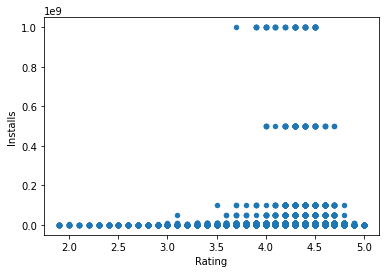

In [133]:
data.plot(kind = 'scatter', x = 'Rating', y = 'Installs')
pass

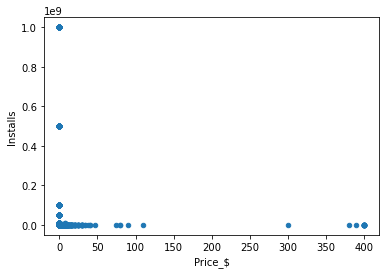

In [134]:
data.plot(kind = 'scatter', x = 'Price_$', y = 'Installs')
pass

Вычислим матрицу корреляции для количественных признаков:

In [135]:
corr_mat = data.corr()
corr_mat

,Rating,Reviews,Size_Mb,Installs,Price_$
Rating,1.000000,0.069360,0.041243,0.050512,-0.024531
Reviews,0.069360,1.000000,0.065366,0.643071,-0.009311
Size_Mb,0.041243,0.065366,1.000000,-0.003617,-0.013746
Installs,0.050512,0.643071,-0.003617,1.000000,-0.011270
Price_$,-0.024531,-0.009311,-0.013746,-0.011270,1.000000


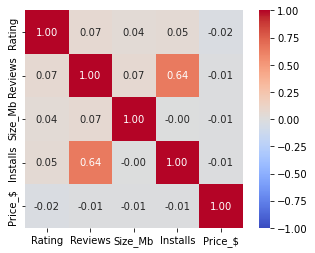

In [139]:
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

### Бинаризация категориальных признаков

In [144]:
data['Type'] = pd.factorize(data['Type'])[0]

In [151]:
Category_dummies = pd.get_dummies(data['Category'])
ContentRating_dummies = pd.get_dummies(data['Content Rating'])
Genres_dummies = pd.get_dummies(data['Genres'])

In [168]:
#data = pd.concat((data, Category_dummies), axis=1)
#data = data.drop(['Category'], axis=1)
#data = pd.concat((data, ContentRating_dummies), axis=1)
#data = data.drop(['Content Rating'], axis=1)
#data = pd.concat((data, Genres_dummies), axis=1)
#data = data.drop(['Genres'], axis=1)

In [162]:
data.head()

,Rating,Reviews,Size_Mb,Installs,Type,Price_$,1.9,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
0,4.1,159,19.0,10000,0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14.0,500000,0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8.7,5000000,0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25.0,50000000,0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2.8,100000,0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Классификация

In [180]:
X = data.drop(['Installs'], axis=1)
y = data['Installs']

In [183]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

7547 3235


In [185]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [188]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)

In [189]:
err_test

0.5319938176197836

In [190]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.4913213413670138 55


Ошибка на тестовой выборке 0.49, оптимальное количество соседей: 55